# K-means cluster
利用k-means方法，來對景點評論分數的資料作客群分類，希望能夠把使用者們分成小群。

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import cluster, datasets, metrics
import matplotlib.pyplot as plt
%matplotlib inline

把資料讀進來。因為k-means不能處理NaN資料，所以要把有NaN資料處理掉。這裡因為在這一筆資料中，有NaN的資料並不多，所以選擇直接drop掉。

In [2]:
df = pd.read_csv("google_review_ratings.csv")
df = df.drop('User', 1)
df.columns = ['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services', 'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars', 'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 'beauty_and_spas', 'cafes', 'view_points', 'monuments', 'gardens']
df = df.dropna(0, 'any')
df = df.reset_index(drop=True)
df.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_and_spas,cafes,view_points,monuments,gardens
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


偷看一下。df中有24個景點，5454個使用者留下分數。

In [3]:
df

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_and_spas,cafes,view_points,monuments,gardens
0,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00
1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00
2,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00
3,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00
4,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00
5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,2.65,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00
6,0.00,5.00,3.63,3.63,5.00,2.92,3.03,2.35,2.33,2.64,...,1.75,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00
7,0.00,5.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,2.64,...,1.74,0.60,0.50,0.00,0.50,0.00,0.00,0.0,0.00,0.00
8,0.00,5.00,3.64,3.64,5.00,2.92,3.03,2.62,2.32,2.63,...,0.75,0.60,0.00,0.00,0.50,0.00,0.00,0.0,0.00,0.00
9,0.00,5.00,3.64,3.64,5.00,2.92,5.00,2.35,2.32,2.63,...,0.74,0.59,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00


因為在找有問題的資料，所以一個一個轉成float。後來找到，但捨不得改了。

In [4]:
df.churches = df.churches.astype(float)
df.resorts = df.resorts.astype(float)
df.beaches = df.beaches.astype(float)
df.parks = df.parks.astype(float)
df.theatres = df.theatres.astype(float)
df.museums = df.museums.astype(float)
df.malls = df.malls.astype(float)
df.zoo = df.zoo.astype(float)
df.restaurants = df.restaurants.astype(float)
df.pubs_bars = df.pubs_bars.astype(float)
df.local_services = df.local_services.astype(float)
df.burger_pizza_shops = df.burger_pizza_shops.astype(float)
df.hotels_other_lodgings = df.hotels_other_lodgings.astype(float)
df.juice_bars = df.juice_bars.astype(float)
df.art_galleries = df.art_galleries.astype(float)
df.dance_clubs = df.dance_clubs.astype(float)
df.swimming_pools = df.swimming_pools.astype(float)
df.gyms = df.gyms.astype(float)
df.bakeries = df.bakeries.astype(float)
df.beauty_and_spas = df.beauty_and_spas.astype(float)
df.cafes = df.cafes.astype(float)
df.view_points = df.view_points.astype(float)
df.monuments = df.monuments.astype(float)
df.gardens = df.gardens.astype(float)
X = df[['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services', 'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars', 'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 'beauty_and_spas', 'cafes', 'view_points', 'monuments', 'gardens']].values

因為不知道k要設多少，所以嘗試用輪廓係數來找k的值。另外因為景點總共也才24個，如果太多群就會變成一個景點配一群使用者，感覺有點沒意義。所以決定在7~16之間利用輪廓係數找k值。
執行了幾次之後找出來k = 12的次數最多，所以決定把K設為12。

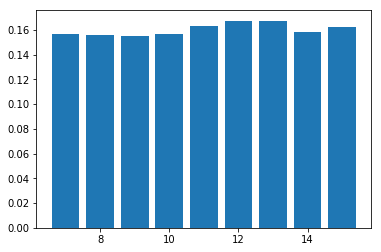

12


In [5]:
silhouette_avgs = []
ks = range(7, 16)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(X)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 7 到 15 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
#print(silhouette_avgs)
print(silhouette_avgs.index(max(silhouette_avgs)) + 7)

把分了12群的資料畫成圖。果然看不出什麼鬼。

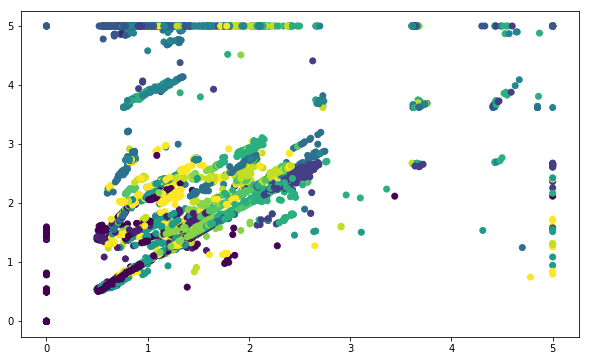

array([[0.63595436, 0.90504149, 1.57408714, 1.56863071, 1.58946058,
        1.60371369, 2.90630705, 1.95141079, 2.74271784, 2.95041494,
        3.33201245, 4.35099585, 4.58529046, 4.90746888, 3.85294606,
        0.74232365, 0.81392116, 0.95112033, 1.38522822, 1.08450207,
        0.56894191, 0.54506224, 0.52894191, 0.63539419],
       [1.24281782, 1.43315858, 1.71895151, 2.18722149, 2.27154653,
        2.573827  , 3.65391874, 3.70752294, 4.55239843, 4.54260813,
        4.13474443, 2.04121887, 1.66203145, 1.37866317, 1.28435125,
        1.05584535, 0.62870249, 0.34516383, 0.30878113, 0.4157405 ,
        0.56566186, 1.15550459, 1.04731324, 1.19782438],
       [2.65084795, 2.61833333, 2.43657895, 2.04432749, 1.8971345 ,
        1.59067251, 1.54081871, 1.30649123, 1.44245614, 1.49093567,
        1.52745614, 1.12429825, 1.01517544, 1.07502924, 2.37590643,
        1.63619883, 1.43894737, 1.32444444, 1.46084795, 2.05923977,
        2.86643275, 4.04476608, 3.58666667, 3.37921053],
       [1.147

In [6]:
#K = silhouette_avgs.index(max(silhouette_avgs)) + 2
K = 12
km = KMeans(n_clusters = K)
y_pred = km.fit_predict(X)
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred) #C是第三維度 顏色做維度
plt.show()

km.cluster_centers_ #各群中心點(X,Y)的位置

偷看一下預測出來的y_pred。

In [7]:
y_pred

array([11, 11, 11, ...,  2,  2,  2])

宣告df_0 ~ df_11的dataframe變數，用來存被分類的使用者資料。

In [8]:
for i in range(K) : 
    globals()['df_' + str(i)] = pd.DataFrame(columns=('churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services', 'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars', 'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 'beauty_and_spas', 'cafes', 'view_points', 'monuments', 'gardens'))

In [9]:
for i, predict in enumerate(y_pred):
    if predict == 0 :
        df_0 = df_0.append(df.loc[i])
    elif predict == 1 :
        df_1 = df_1.append(df.loc[i])
    elif predict == 2 :
        df_2 = df_2.append(df.loc[i])
    elif predict == 3 :
        df_3 = df_3.append(df.loc[i])
    elif predict == 4 :
        df_4 = df_4.append(df.loc[i])
    elif predict == 5 :
        df_5 = df_5.append(df.loc[i])
    elif predict == 6 :
        df_6 = df_6.append(df.loc[i])
    elif predict == 7 :
        df_7 = df_7.append(df.loc[i])
    elif predict == 8 :
        df_8 = df_8.append(df.loc[i])
    elif predict == 9 :
        df_9 = df_9.append(df.loc[i])
    elif predict == 10 :
        df_10 = df_10.append(df.loc[i])
    elif predict == 11 :
        df_11 = df_11.append(df.loc[i])

計算每一群的每一個景點的平均分數。用insert插到最前面，比較好跟景點的名字對著看。


In [10]:
# to add means
df_0_T = df_0.T
df_1_T = df_1.T
df_2_T = df_2.T
df_3_T = df_3.T
df_4_T = df_4.T
df_5_T = df_5.T
df_6_T = df_6.T
df_7_T = df_7.T
df_8_T = df_8.T
df_9_T = df_9.T
df_10_T = df_10.T
df_11_T = df_11.T

In [11]:
df_0_T.insert(loc = 0, column='category_mean', value=df_0_T.mean(axis=1))
df_1_T.insert(loc = 0, column='category_mean', value=df_1_T.mean(axis=1))
df_2_T.insert(loc = 0, column='category_mean', value=df_2_T.mean(axis=1))
df_3_T.insert(loc = 0, column='category_mean', value=df_3_T.mean(axis=1))
df_4_T.insert(loc = 0, column='category_mean', value=df_4_T.mean(axis=1))
df_5_T.insert(loc = 0, column='category_mean', value=df_5_T.mean(axis=1))
df_6_T.insert(loc = 0, column='category_mean', value=df_6_T.mean(axis=1))
df_7_T.insert(loc = 0, column='category_mean', value=df_7_T.mean(axis=1))
df_8_T.insert(loc = 0, column='category_mean', value=df_8_T.mean(axis=1))
df_9_T.insert(loc = 0, column='category_mean', value=df_9_T.mean(axis=1))
df_10_T.insert(loc = 0, column='category_mean', value=df_10_T.mean(axis=1))
df_11_T.insert(loc = 0, column='category_mean', value=df_11_T.mean(axis=1))

把分群結果印出來看看。因為有點多所以討論直接寫在report。

In [12]:
df_0_T

,category_mean,646,649,650,652,653,654,655,656,657,...,5252,5253,5254,5255,5256,5257,5258,5259,5260,5264
churches,0.635954,0.00,0.00,0.00,0.00,0.00,0.00,0.77,0.00,0.00,...,0.97,0.98,1.00,1.01,1.03,1.03,1.05,1.06,1.08,1.16
resorts,0.905041,1.40,1.40,1.41,1.41,1.42,1.42,1.43,1.44,1.46,...,1.34,1.36,1.36,2.06,2.06,2.07,2.09,1.11,2.11,1.48
beaches,1.574087,1.39,1.39,1.40,1.40,1.40,1.41,1.41,1.42,1.43,...,1.72,1.73,1.74,1.98,1.99,2.01,2.02,2.04,2.06,1.49
parks,1.568631,1.40,1.40,1.40,1.40,1.40,1.40,1.40,1.41,1.41,...,1.67,1.68,1.69,1.69,1.70,1.71,1.72,1.73,1.73,1.76
theatres,1.589461,1.59,1.43,1.42,1.56,1.43,1.42,1.42,1.42,1.42,...,1.66,1.67,1.67,1.68,1.69,1.70,1.70,1.70,1.71,1.73
museums,1.603714,1.46,1.45,1.45,1.44,1.63,1.60,1.63,1.44,1.44,...,1.67,1.68,1.69,2.07,1.71,1.70,1.71,1.71,1.71,1.73
malls,2.906307,2.68,2.68,2.69,2.70,2.71,2.73,3.28,5.00,1.47,...,5.00,5.00,5.00,5.00,5.00,5.00,1.75,1.73,1.73,1.76
zoo,1.951411,2.69,3.27,3.26,2.69,2.69,2.69,2.70,2.70,2.70,...,2.95,2.94,1.72,1.73,1.73,1.74,1.74,1.74,1.75,2.81
restaurants,2.742718,3.31,3.32,3.32,3.33,3.32,2.72,2.71,2.71,2.72,...,2.36,2.35,2.35,2.34,2.34,2.88,2.32,2.29,2.28,2.82
pubs_bars,2.950415,5.00,3.33,5.00,3.32,3.33,3.32,3.32,3.32,3.33,...,2.93,2.92,2.91,2.90,2.89,2.87,2.86,2.85,2.84,2.78


In [13]:
df_1_T

,category_mean,56,124,125,128,129,174,175,176,190,...,5193,5194,5195,5196,5197,5198,5199,5200,5201,5202
churches,1.242818,0.69,1.39,0.70,0.69,0.68,1.41,1.43,1.46,1.36,...,0.55,0.54,1.43,1.44,1.44,0.52,0.51,0.51,0.50,0.00
resorts,1.433159,0.69,1.25,1.25,0.73,0.73,1.80,1.81,1.83,1.38,...,1.42,1.42,1.42,1.42,1.43,1.42,1.43,1.43,1.43,1.44
beaches,1.718952,0.72,1.35,1.35,5.00,5.00,1.80,1.81,1.83,1.42,...,1.42,1.42,1.42,1.42,1.42,1.42,1.42,1.42,1.42,1.42
parks,2.187221,5.00,1.33,1.34,1.35,1.38,1.67,1.68,1.69,1.91,...,1.43,1.43,1.43,1.42,1.42,1.42,1.42,1.43,1.43,1.42
theatres,2.271547,3.83,1.34,1.35,1.35,1.35,2.40,3.17,3.18,3.21,...,2.66,5.00,1.64,1.45,1.45,1.45,1.45,1.62,1.57,1.45
museums,2.573827,2.96,1.36,1.37,5.00,1.36,4.39,4.38,5.00,3.21,...,2.65,1.49,1.49,1.48,1.47,1.47,2.68,1.47,1.47,1.49
malls,3.653919,2.94,4.12,4.14,4.91,4.91,4.59,4.58,4.57,5.00,...,2.65,2.65,2.65,2.65,2.66,2.66,2.66,2.67,2.67,2.68
zoo,3.707523,5.00,5.00,5.00,1.42,1.41,3.98,3.92,3.92,3.89,...,2.67,2.67,2.66,2.66,2.67,3.28,2.68,3.28,2.67,2.67
restaurants,4.552398,2.89,2.86,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,3.27,3.27,3.28,3.27,3.28,3.28,3.28,3.28,3.28,3.29
pubs_bars,4.542608,2.16,2.76,2.76,5.00,5.00,5.00,5.00,5.00,5.00,...,3.29,3.29,5.00,5.00,5.00,3.29,3.29,3.28,3.29,3.29


In [14]:
df_2_T

,category_mean,806,807,808,809,810,811,812,813,814,...,5436,5445,5446,5447,5448,5449,5450,5451,5452,5453
churches,2.650848,2.21,2.23,2.26,2.26,5.00,2.29,2.29,2.30,2.32,...,4.47,4.59,4.60,1.65,0.91,0.91,0.93,0.94,0.95,0.95
resorts,2.618333,2.21,2.22,2.23,2.24,2.26,2.27,2.28,2.30,2.31,...,3.73,3.88,5.00,3.93,3.94,5.00,5.00,5.00,4.05,4.07
beaches,2.436579,2.24,5.00,2.24,2.25,2.26,2.28,2.30,2.32,1.99,...,2.72,3.92,3.94,3.96,3.98,4.00,4.02,4.03,4.05,5.00
parks,2.044327,1.92,1.93,1.93,1.93,1.94,1.79,1.96,1.98,2.00,...,2.70,2.76,2.77,2.77,2.78,2.79,2.79,2.80,2.81,2.82
theatres,1.897135,1.94,1.72,1.71,1.93,1.93,1.94,1.94,1.71,1.71,...,2.69,2.74,2.75,2.76,2.76,2.77,2.78,2.78,2.79,2.80
museums,1.590673,1.45,1.44,1.66,1.70,1.56,1.56,1.56,1.71,1.39,...,3.55,2.33,2.69,2.34,2.57,2.57,2.57,2.57,2.44,2.57
malls,1.540819,1.43,1.42,1.41,1.42,5.00,5.00,1.40,1.38,1.37,...,2.50,2.45,2.45,2.44,2.44,2.43,1.77,1.75,1.76,2.42
zoo,1.306491,1.41,1.41,1.40,1.39,1.39,1.38,1.37,1.37,1.37,...,1.31,1.16,1.14,1.13,1.11,1.09,1.07,1.05,1.03,1.02
restaurants,1.442456,1.48,1.42,1.41,1.40,1.40,1.40,1.39,1.42,1.38,...,1.29,5.00,1.13,1.79,1.78,1.77,1.76,1.75,1.74,1.74
pubs_bars,1.490936,1.61,1.67,1.43,1.42,1.42,1.62,1.61,1.42,1.59,...,1.26,1.11,1.10,1.08,1.06,1.04,1.02,1.00,0.98,0.96


In [15]:
df_3_T

,category_mean,111,119,120,121,122,131,143,144,145,...,5116,5122,5123,5124,5126,5129,5130,5152,5156,5157
churches,1.147689,0.77,1.24,0.74,0.73,5.00,0.78,0.81,0.83,0.85,...,0.78,0.90,0.92,0.94,0.98,1.04,1.06,1.37,1.37,1.38
resorts,4.988124,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
beaches,2.226384,1.32,1.33,1.33,1.34,5.00,1.29,1.30,1.31,1.32,...,1.54,1.62,1.64,1.66,1.69,1.75,1.78,1.43,1.43,1.44
parks,2.093432,1.33,1.33,1.33,1.33,1.33,1.36,1.31,1.32,1.33,...,2.10,2.18,2.19,2.21,2.23,2.27,2.29,2.56,2.56,2.56
theatres,2.276888,1.35,1.35,1.35,1.35,1.34,1.35,1.37,1.38,1.39,...,2.95,2.89,2.21,2.23,2.25,2.96,3.04,3.20,2.58,3.19
museums,3.072380,4.09,4.10,4.15,1.37,1.37,1.36,1.42,1.39,1.41,...,5.00,3.03,3.04,3.06,3.05,3.06,3.07,3.20,3.20,3.20
malls,4.636842,5.00,4.77,4.10,4.11,4.15,4.72,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
zoo,3.416224,2.75,5.00,5.00,5.00,5.00,1.41,1.43,1.43,4.09,...,1.57,5.00,5.00,5.00,5.00,5.00,1.30,5.00,5.00,5.00
restaurants,4.337300,2.76,2.76,2.76,5.00,2.85,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
pubs_bars,3.542288,1.60,2.30,2.76,2.30,2.76,2.87,2.83,5.00,5.00,...,1.51,1.41,1.39,1.37,1.33,1.28,1.26,0.93,0.92,0.92


In [16]:
df_4_T

,category_mean,58,59,72,73,74,75,77,78,79,...,5420,5421,5422,5423,5424,5425,5426,5428,5429,5437
churches,1.532633,0.71,0.72,0.80,0.82,0.83,0.85,0.90,0.92,0.94,...,3.68,4.85,3.68,4.41,4.41,4.41,4.41,4.42,4.42,4.49
resorts,2.211496,0.72,0.73,0.86,0.87,0.89,0.91,0.94,0.96,0.98,...,3.63,3.62,3.62,3.62,3.63,3.65,3.63,3.63,3.64,5.00
beaches,3.215663,2.55,5.00,0.87,0.89,0.90,0.91,0.95,0.97,0.99,...,5.00,5.00,5.00,5.00,5.00,5.00,3.69,3.69,3.70,2.73
parks,4.560189,5.00,5.00,0.90,5.00,4.64,4.64,4.64,4.64,4.64,...,2.64,2.65,2.66,5.00,5.00,2.66,2.67,2.67,2.66,2.70
theatres,4.173958,3.81,3.81,3.88,3.88,3.89,3.90,3.91,3.92,3.93,...,2.64,2.64,2.64,2.64,2.64,2.65,2.65,2.65,2.65,2.69
museums,3.222045,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,2.59,2.52,2.65,2.65,2.65,2.65,2.66,2.66,2.61,2.70
malls,2.447140,2.94,2.94,2.92,5.00,2.91,2.91,2.89,2.88,2.88,...,2.50,1.92,1.92,2.54,2.59,2.52,2.52,2.52,2.51,2.49
zoo,1.909621,2.96,2.90,2.90,2.90,2.89,2.88,2.87,2.86,2.86,...,1.76,1.89,1.89,1.90,1.41,1.41,1.41,1.41,1.40,1.29
restaurants,2.371439,2.88,2.88,2.79,2.78,2.77,2.75,2.73,2.71,2.70,...,1.49,4.86,4.86,1.60,4.86,1.39,1.39,1.38,1.38,1.27
pubs_bars,2.463409,2.14,2.14,2.79,2.77,2.76,2.75,2.72,2.71,2.69,...,1.35,1.39,1.36,1.36,1.36,1.36,1.36,1.36,1.35,1.25


In [17]:
df_5_T

,category_mean,6,7,8,9,19,21,22,130,390,...,5081,5082,5083,5084,5085,5086,5087,5414,5416,5417
churches,1.575085,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.68,5.00,...,0.82,0.82,1.50,1.47,1.47,0.80,0.79,3.61,3.62,3.62
resorts,4.344820,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,2.74,2.74,2.74,2.74,2.74,2.04,2.03,5.00,3.67,5.00
beaches,3.995825,3.63,3.63,3.64,3.64,3.70,5.00,5.00,5.00,5.00,...,2.88,2.88,2.88,2.88,2.88,2.88,2.76,2.64,5.00,5.00
parks,3.912770,3.63,3.63,3.64,3.64,3.66,3.66,3.66,5.00,2.63,...,5.00,5.00,5.00,2.90,5.00,5.00,5.00,2.62,2.63,2.63
theatres,4.153662,5.00,5.00,5.00,5.00,2.95,2.94,2.95,1.35,2.75,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2.59,2.59,2.60
museums,3.337799,2.92,2.92,2.92,2.92,2.93,2.93,2.93,1.36,2.75,...,5.00,5.00,5.00,5.00,5.00,5.00,4.08,2.48,2.49,2.49
malls,2.614896,3.03,5.00,3.03,5.00,2.94,2.94,2.94,5.00,2.16,...,1.58,1.58,1.58,1.58,1.59,1.59,1.59,1.88,1.89,1.90
zoo,2.184023,2.35,2.63,2.62,2.35,2.99,3.00,3.00,1.41,2.07,...,1.57,1.57,1.55,1.55,1.55,1.55,1.56,1.37,1.37,1.38
restaurants,2.639146,2.33,2.33,2.32,2.32,1.70,1.70,1.70,5.00,3.64,...,1.54,1.54,1.54,1.54,1.54,1.54,1.55,1.37,1.35,1.36
pubs_bars,2.513188,2.64,2.64,2.63,2.63,2.62,2.31,2.31,2.87,5.00,...,1.55,1.55,1.55,1.55,1.55,1.56,1.55,1.34,1.34,1.35


In [18]:
df_6_T

,category_mean,123,126,132,133,134,135,136,137,138,...,5131,5132,5134,5135,5137,5138,5139,5148,5151,5155
churches,1.110505,0.73,0.70,0.68,0.67,0.75,0.73,0.73,0.76,0.76,...,1.08,1.10,1.14,1.16,1.49,5.00,2.66,1.39,1.37,1.37
resorts,1.301353,1.25,0.75,0.71,0.70,0.70,0.69,0.70,0.70,0.70,...,2.33,2.34,1.18,2.39,2.42,2.43,1.53,1.42,1.63,1.62
beaches,2.302339,1.34,5.00,1.26,1.25,1.25,1.26,1.26,1.26,1.26,...,1.80,2.32,2.35,2.37,2.40,1.27,2.43,2.55,1.42,1.43
parks,2.218601,1.33,1.28,1.36,1.28,1.36,1.36,1.37,1.36,1.36,...,2.31,2.32,2.35,2.37,2.40,2.41,2.43,2.55,2.55,2.56
theatres,2.533394,1.34,1.30,1.35,1.35,1.35,1.36,1.36,1.35,1.35,...,3.05,3.06,3.07,3.08,3.10,3.11,3.09,3.18,3.19,3.19
museums,3.584106,4.71,4.71,1.36,1.36,1.46,1.47,1.37,1.37,1.36,...,3.08,3.12,5.00,3.15,3.14,5.00,5.00,3.20,3.20,3.20
malls,4.737683,4.12,4.91,4.74,4.73,4.73,4.73,4.73,4.73,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
zoo,3.223830,5.00,4.79,1.40,1.41,1.40,1.40,1.41,1.41,1.41,...,1.28,1.27,5.00,5.00,1.17,1.14,1.12,0.97,5.00,5.00
restaurants,4.578532,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2.67,5.00,5.00
pubs_bars,3.371720,2.76,2.77,2.87,5.00,5.00,5.00,5.00,5.00,5.00,...,1.24,1.22,1.17,1.15,1.11,1.09,1.08,0.92,0.93,0.92


In [19]:
df_7_T

,category_mean,759,760,762,763,764,765,766,768,769,...,5431,5432,5434,5438,5439,5440,5441,5442,5443,5444
churches,2.101673,1.68,1.68,1.69,1.70,1.71,1.72,1.73,1.76,1.78,...,4.43,4.44,4.45,4.50,4.51,1.52,4.54,4.55,4.56,1.32
resorts,2.629020,2.65,1.73,1.77,5.00,1.77,1.75,1.76,1.78,1.80,...,5.00,3.67,3.71,2.77,5.00,3.80,5.00,3.83,5.00,3.87
beaches,2.442347,2.64,2.64,2.67,2.67,1.77,1.78,1.78,1.81,1.82,...,5.00,3.74,3.74,3.81,2.75,2.76,2.76,3.87,3.89,3.91
parks,2.287449,1.95,1.95,1.96,1.97,1.98,1.99,5.00,5.00,3.21,...,2.67,2.67,2.68,2.71,2.72,2.73,2.73,2.73,2.74,2.75
theatres,2.098898,1.93,1.94,1.95,1.96,1.96,1.97,1.98,5.00,2.01,...,2.66,2.66,2.67,2.70,2.71,2.71,2.72,2.73,2.73,2.74
museums,2.019000,1.97,1.96,1.95,1.96,1.96,1.96,1.97,1.97,1.98,...,2.60,2.61,2.72,2.71,2.74,2.70,2.69,2.33,2.32,2.33
malls,2.107122,5.00,5.00,1.97,1.97,1.97,1.98,1.98,1.99,2.01,...,2.51,2.50,2.50,2.49,2.47,2.47,2.46,2.46,2.46,2.45
zoo,1.681041,1.99,2.34,1.99,1.99,1.99,1.99,2.45,2.44,2.00,...,1.39,1.37,1.34,1.28,1.27,1.25,1.23,1.22,1.20,1.18
restaurants,1.941592,2.48,2.48,5.00,2.11,2.10,2.02,2.01,2.00,2.06,...,1.36,1.35,1.32,1.60,1.57,1.23,5.00,5.00,5.00,5.00
pubs_bars,1.603184,2.06,2.06,2.28,2.03,2.26,2.25,2.24,2.22,2.20,...,1.34,1.32,1.29,1.23,1.22,1.20,1.18,1.17,1.15,1.13


In [20]:
df_8_T

,category_mean,222,251,254,255,256,257,258,259,260,...,4818,4826,4830,4831,4833,4834,4835,4836,4838,4849
churches,1.889462,1.40,1.50,1.55,1.57,1.59,1.61,1.64,1.65,1.68,...,2.14,1.96,1.96,1.88,1.97,2.16,1.89,1.98,1.91,2.36
resorts,2.162769,1.40,1.74,1.80,1.82,1.83,1.85,1.87,1.89,1.91,...,2.36,2.38,2.38,2.38,2.39,2.39,2.39,2.40,2.47,2.58
beaches,2.729538,1.42,1.75,1.81,1.83,1.84,1.87,1.89,1.90,1.92,...,2.47,2.38,2.42,2.39,2.39,2.39,2.41,2.45,2.43,2.57
parks,3.628308,5.00,1.78,1.84,5.00,5.00,1.90,5.00,5.00,2.32,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2.59
theatres,3.669423,1.95,1.58,1.53,1.54,1.54,1.56,1.77,1.79,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,3.25
museums,2.943923,3.25,1.85,1.86,1.86,1.90,1.90,1.88,1.88,1.88,...,2.37,3.25,3.25,3.25,2.38,3.25,3.25,2.38,3.25,3.23
malls,3.357692,1.81,3.22,3.21,3.21,3.21,3.21,3.21,3.21,3.21,...,3.24,3.24,3.24,3.24,3.24,3.24,3.24,3.24,3.24,3.23
zoo,2.959192,3.23,3.12,3.09,3.09,3.08,3.07,3.06,3.06,3.05,...,2.91,2.91,2.91,2.91,2.91,2.91,2.91,2.91,2.90,2.80
restaurants,3.656731,4.52,3.13,4.35,4.34,4.33,4.60,4.58,4.57,5.00,...,4.12,2.92,2.91,2.91,2.91,2.91,2.91,2.91,2.90,2.80
pubs_bars,3.469077,3.88,3.60,3.56,3.54,3.53,3.51,3.50,3.48,3.47,...,3.15,2.93,2.93,2.93,2.92,2.92,2.92,2.92,2.92,2.82


In [21]:
df_9_T

,category_mean,398,642,643,644,651,733,734,735,736,...,5278,5279,5280,5281,5282,5283,5284,5285,5287,5340
churches,1.436473,1.19,0.51,0.50,0.00,0.00,1.33,1.35,1.39,1.42,...,1.43,1.45,1.46,1.48,1.50,1.52,1.54,1.56,1.60,2.21
resorts,1.667053,1.22,1.38,1.39,1.39,0.00,1.85,1.38,1.40,1.41,...,1.46,1.48,1.50,1.52,1.53,1.55,1.57,1.60,1.63,2.26
beaches,1.970000,1.98,1.40,1.40,1.39,1.40,2.30,1.84,2.34,2.36,...,1.48,1.50,1.52,1.54,1.55,1.57,1.59,1.61,1.65,2.17
parks,2.140435,2.73,1.57,1.44,1.41,1.41,1.80,1.81,1.81,1.82,...,1.86,1.84,1.84,1.85,1.85,1.88,1.89,1.90,1.90,2.15
theatres,2.119372,3.56,5.00,1.48,2.69,1.57,1.79,1.80,1.80,1.81,...,1.81,1.82,1.82,1.83,1.83,1.84,1.84,1.85,1.86,1.60
museums,2.029324,2.79,2.67,2.67,1.47,1.45,1.80,1.81,1.81,1.82,...,1.81,1.81,1.82,1.82,1.83,1.83,1.84,1.84,1.85,1.30
malls,3.485459,2.15,2.67,2.67,2.67,2.69,5.00,5.00,5.00,5.00,...,1.82,1.83,1.83,1.84,1.84,1.85,1.85,1.86,1.87,1.27
zoo,2.224928,2.03,3.30,2.69,2.70,2.70,1.84,1.85,1.85,1.86,...,1.87,1.87,1.87,2.57,2.55,2.54,2.53,2.51,2.22,1.28
restaurants,2.689227,3.54,5.00,5.00,3.31,3.31,2.67,2.32,2.31,2.31,...,2.59,2.58,2.57,2.55,2.54,2.41,2.39,2.39,2.48,1.53
pubs_bars,2.529855,5.00,5.00,5.00,3.33,3.32,2.41,2.39,2.37,2.35,...,2.60,2.58,2.57,2.44,2.42,2.53,2.52,2.51,2.48,1.53


In [22]:
df_10_T

,category_mean,115,117,118,326,328,329,330,331,332,...,4871,4872,4873,4874,4877,4878,4879,5088,5089,5090
churches,1.804613,0.75,1.24,1.24,2.40,2.09,2.09,1.98,1.98,1.72,...,1.60,1.50,0.95,0.94,1.28,1.29,0.97,0.81,0.81,1.46
resorts,2.587811,1.28,1.35,1.25,5.00,5.00,2.85,5.00,2.84,2.41,...,2.42,2.42,2.42,2.42,2.43,5.00,1.74,2.03,2.03,0.84
beaches,2.430303,1.32,1.32,1.33,2.61,2.61,2.61,2.61,2.61,2.61,...,2.63,2.64,2.64,2.65,2.43,2.43,2.43,2.75,2.74,2.73
parks,3.530572,1.33,1.36,1.37,2.63,2.62,2.62,2.62,2.62,2.63,...,2.63,2.63,2.63,2.63,2.64,2.63,2.64,5.00,2.89,2.89
theatres,4.387508,4.70,4.70,1.35,5.00,2.22,2.21,2.19,2.19,2.19,...,5.00,2.65,2.65,2.65,5.00,5.00,2.66,5.00,5.00,5.00
museums,3.440505,4.12,4.11,4.11,3.83,3.83,3.83,3.83,3.84,3.84,...,3.26,2.14,3.27,5.00,5.00,5.00,5.00,4.08,5.00,5.00
malls,3.607138,5.00,4.79,4.77,5.00,5.00,3.84,3.83,3.83,3.83,...,3.25,3.26,3.26,3.87,2.15,3.28,5.00,1.60,5.00,1.60
zoo,2.938923,2.83,2.76,5.00,5.00,5.00,5.00,5.00,2.80,2.80,...,2.81,3.25,3.25,3.25,3.26,3.27,3.27,1.58,1.57,1.59
restaurants,2.680707,2.75,2.75,2.75,2.79,2.79,2.79,2.79,2.79,2.80,...,2.79,2.80,2.80,2.81,2.81,3.27,3.27,1.55,1.55,1.55
pubs_bars,2.599663,2.46,2.47,2.90,2.80,2.80,2.81,2.81,2.82,2.81,...,2.79,2.79,2.79,2.79,2.80,2.80,2.80,1.55,1.55,1.55


In [23]:
df_11_T

,category_mean,0,1,2,3,4,5,10,11,12,...,5147,5149,5150,5153,5158,5164,5171,5172,5173,5174
churches,1.166175,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.38,1.38,1.37,1.37,1.38,1.43,1.42,1.42,1.42,1.42
resorts,1.546788,0.00,0.00,0.00,0.50,0.00,0.00,0.53,0.53,0.54,...,1.41,1.42,1.42,1.62,1.64,1.45,1.44,1.44,1.44,1.46
beaches,2.708482,3.63,3.63,3.63,3.63,3.63,3.63,3.65,3.65,3.66,...,2.54,1.44,1.43,1.43,1.44,1.48,1.47,1.48,2.63,1.56
parks,3.245985,3.65,3.65,3.63,3.63,3.63,3.63,3.67,3.68,3.68,...,1.45,2.56,2.56,2.56,2.57,2.60,2.60,2.61,2.61,1.50
theatres,4.048219,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,3.17,3.19,3.18,2.58,2.59,2.62,2.63,3.22,2.62,2.63
museums,4.288628,2.92,2.92,2.92,2.92,2.92,2.92,2.92,2.93,2.93,...,3.19,3.20,3.20,3.20,3.21,2.65,3.22,3.22,3.21,3.22
malls,4.529693,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,3.23,3.23,3.23,3.23
zoo,2.422015,2.35,2.64,2.64,2.35,2.64,2.63,2.61,2.61,2.61,...,0.98,5.00,3.87,5.00,5.00,5.00,5.00,5.00,3.26,3.25
restaurants,2.881474,2.33,2.33,2.33,2.33,2.33,2.33,2.32,2.31,2.30,...,5.00,5.00,5.00,5.00,5.00,5.00,0.90,0.90,0.91,0.91
pubs_bars,2.080336,2.64,2.65,2.64,2.64,2.64,2.65,2.63,2.62,2.62,...,0.93,0.92,0.93,0.93,0.91,0.90,1.16,1.16,1.15,1.16


In [24]:
for i in range(K) : 
    globals()['df_' + str(i) + '_T'].T.to_csv('./clusters/df_' + str(K) + 'clusters_' + str(i) + '.csv')